In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv("01_framingham_clean.csv")
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0,0,0,1,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0,1,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.0,75.0,70.0,1,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,0,0,1,0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0,0,1,0,0


In [78]:
# train test val split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

In [ ]:
# Apply undersampling to balance the classes in the training set
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=1)  # 1: equal balance between the classes
X_under, y_under = undersample.fit_resample(X_train, y_train)

X_train = X_under
y_train = y_under

# Generalized Functions for Machine Learning and Model Optimization

## Import Libraries

In [ ]:
# import all necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

## Function for Machine Learning Model

In [ ]:
def ml_model(model, X_train, y_train, X_test, y_test):

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate performance metrics for the test set
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Print performance on the test set
    print("Test Set Performance:")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_pred_test))
    print("\nAccuracy of Model (Test):", acc_test * 100, "\n")
    print(classification_report(y_test, y_pred_test))
    return()

## Function for Model Optimization

# Machine Learning with undersampling

## Logistic Regression

In [82]:
# Model 1: Logistic Regression
m1 = "Logistic Regression"
lr = LogisticRegression()
results = ml_model(lr, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[492 233]
 [ 43  80]]

Accuracy of Model (Test): 67.45283018867924 

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       725
           1       0.26      0.65      0.37       123

    accuracy                           0.67       848
   macro avg       0.59      0.66      0.57       848
weighted avg       0.82      0.67      0.72       848

Model Performance Results: None


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# try to focus f1-score to target== 1
f1_scorer = make_scorer(f1_score, pos_label=1)

param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    'penalty': ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 200, 300]
}

lr_model = LogisticRegression()
results = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring=f1_scorer,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train, y_train)

print("Best parameters found:", results.best_params_)
print("Best F1 score for target == 1:", results.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best F1 score for target == 1: 0.6719989658696692


In [84]:
# Apply improved model

lr = LogisticRegression(solver= 'liblinear', penalty= 'l2', max_iter= 100, C= 0.1)
# Fit the model
lr.fit(X_train, y_train)

# Predict on the test set
lr_predict_test = lr.predict(X_test)
lr_conf_matrix_test = confusion_matrix(y_test, lr_predict_test)
lr_acc_score_test = accuracy_score(y_test, lr_predict_test)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(lr_conf_matrix_test)
print("\nAccuracy of Logistic Regression model (Test):",lr_acc_score_test * 100, "\n")
print(classification_report(y_test, lr_predict_test))

Test Set Performance:
Confusion Matrix (Test):
[[488 237]
 [ 42  81]]

Accuracy of Logistic Regression model (Test): 67.09905660377359 

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       725
           1       0.25      0.66      0.37       123

    accuracy                           0.67       848
   macro avg       0.59      0.67      0.57       848
weighted avg       0.82      0.67      0.72       848



## Naive Bayes

In [85]:
# Model 1: Logistic Regression
m2 = "Naive Bayes"
nb = GaussianNB()
results = ml_model(nb, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[661  64]
 [ 89  34]]

Accuracy of Model (Test): 81.95754716981132 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       725
           1       0.35      0.28      0.31       123

    accuracy                           0.82       848
   macro avg       0.61      0.59      0.60       848
weighted avg       0.80      0.82      0.81       848

Model Performance Results: None


In [86]:
# optimization of the Naive Bayes model

f1_scorer = make_scorer(f1_score, pos_label=1)
# grid
param_grid_nb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# train the model
nb_model = GaussianNB()

results = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid_nb,
    n_iter=5,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train, y_train)

# Return the best model
print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'var_smoothing': 1e-09}
Best score: 0.4394950527271579


In [87]:
# Apply improved model

nb = GaussianNB(var_smoothing=1e-01)
# Fit the model
nb.fit(X_train, y_train)

# Predict on the test set
nb_predict_test = nb.predict(X_test)
nb_conf_matrix_test = confusion_matrix(y_test, nb_predict_test)
nb_acc_score_test = accuracy_score(y_test, nb_predict_test)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(nb_conf_matrix_test)
print("\nAccuracy of Logistic Regression model (Test):", nb_acc_score_test * 100, "\n")
print(classification_report(y_test, nb_predict_test))

Test Set Performance:
Confusion Matrix (Test):
[[665  60]
 [ 93  30]]

Accuracy of Logistic Regression model (Test): 81.95754716981132 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       725
           1       0.33      0.24      0.28       123

    accuracy                           0.82       848
   macro avg       0.61      0.58      0.59       848
weighted avg       0.80      0.82      0.81       848



## Decision Tree

In [88]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier()
results = ml_model(dt, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[413 312]
 [ 63  60]]

Accuracy of Model (Test): 55.77830188679245 

              precision    recall  f1-score   support

           0       0.87      0.57      0.69       725
           1       0.16      0.49      0.24       123

    accuracy                           0.56       848
   macro avg       0.51      0.53      0.47       848
weighted avg       0.77      0.56      0.62       848

Model Performance Results: None


In [89]:
# Improve the Decision Tree model
f1_scorer = make_scorer(f1_score, pos_label=1)
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, None],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"],
    "splitter": ["best", "random"],
}

# train the model
dt_model = DecisionTreeClassifier()

results = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_grid_dt,
    n_iter=20,
    cv=10,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train, y_train)

# Return the best model

print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters found: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'criterion': 'entropy'}
Best score: 0.6341667681149109


In [90]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier(splitter= "random", min_samples_split= 4, min_samples_leaf= 5, max_features= None, max_depth= 3, criterion= "entropy", random_state=42)
dt.fit(X_train, y_train)  # Use undersampled data for training

# Predict on the test set
dt_predict_test = dt.predict(X_test)
dt_conf_matrix_test = confusion_matrix(y_test, dt_predict_test)
dt_acc_score_test = accuracy_score(y_test, dt_predict_test)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(dt_conf_matrix_test)
print("\nAccuracy of Decision Tree (Test):", dt_acc_score_test * 100, "\n")
print(classification_report(y_test, dt_predict_test))

Test Set Performance:
Confusion Matrix (Test):
[[370 355]
 [ 32  91]]

Accuracy of Decision Tree (Test): 54.363207547169814 

              precision    recall  f1-score   support

           0       0.92      0.51      0.66       725
           1       0.20      0.74      0.32       123

    accuracy                           0.54       848
   macro avg       0.56      0.63      0.49       848
weighted avg       0.82      0.54      0.61       848



## Random Forest

In [91]:
# Model 4: Random Forest
m4 = "Random Forest"
rf = RandomForestClassifier()
results = ml_model(rf, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[478 247]
 [ 58  65]]

Accuracy of Model (Test): 64.03301886792453 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       725
           1       0.21      0.53      0.30       123

    accuracy                           0.64       848
   macro avg       0.55      0.59      0.53       848
weighted avg       0.79      0.64      0.69       848

Model Performance Results: None


In [92]:
# Number of trees in random forest
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# random grid for the predefined parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define scoring metric
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    n_iter=20,  # Define as per available resources
    cv=5,  # Cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring=f1_scorer
)

# Fit model
rf_random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", rf_random_search.best_params_)
print("Best F1 Score:", rf_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-package

Best parameters found: {'n_estimators': 1800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best F1 Score: 0.6656603871456602


In [93]:
# optimized Random Forest Model
m4 = "Random Forest"
rf = RandomForestClassifier(n_estimators= 2000, min_samples_split= 2, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 40, bootstrap= True)
rf.fit(X_train, y_train)  # Use undersampled data for training

# Predict on the test set
rf_predict_test = rf.predict(X_test)
rf_conf_matrix_test = confusion_matrix(y_test, rf_predict_test)
rf_acc_score_test = accuracy_score(y_test, rf_predict_test)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(rf_conf_matrix_test)
print("\nAccuracy of Random Forest (Test):", rf_acc_score_test * 100, "\n")
print(classification_report(y_test, rf_predict_test))

Test Set Performance:
Confusion Matrix (Test):
[[469 256]
 [ 51  72]]

Accuracy of Random Forest (Test): 63.79716981132076 

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       725
           1       0.22      0.59      0.32       123

    accuracy                           0.64       848
   macro avg       0.56      0.62      0.54       848
weighted avg       0.80      0.64      0.69       848



## Extreme Gradient Boost

In [94]:
# Model 5: Extreme Gradient Boost
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier()
results = ml_model(xgb, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[452 273]
 [ 57  66]]

Accuracy of Model (Test): 61.08490566037735 

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       725
           1       0.19      0.54      0.29       123

    accuracy                           0.61       848
   macro avg       0.54      0.58      0.51       848
weighted avg       0.79      0.61      0.67       848

Model Performance Results: None


In [95]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 10, 20, 30]  # Adjust for imbalance
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Define as per available resources
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", xgb_random_search.best_params_)
print("Best F1 Score:", xgb_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:

Best parameters found: {'subsample': 0.6, 'scale_pos_weight': 30, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best F1 Score: 0.6805907442769517


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [96]:
# Optimized Model
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier(subsample= 0.8, scale_pos_weight= 30, n_estimators= 400, min_child_weight= 5, max_depth= 9, learning_rate= 0.01, gamma= 0.1, colsample_bytree= 1.0)

xgb.fit(X_train, y_train)

# Predict on the test set
xgb_predict_test = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict_test)
xgb_acc_score = accuracy_score(y_test, xgb_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(xgb_conf_matrix)
print("\nAccuracy of Extreme Gradient Boost:", xgb_acc_score * 100, '\n')
print(classification_report(y_test, xgb_predict_test))

Confusion Matrix (Test):
[[104 621]
 [  3 120]]

Accuracy of Extreme Gradient Boost: 26.41509433962264 

              precision    recall  f1-score   support

           0       0.97      0.14      0.25       725
           1       0.16      0.98      0.28       123

    accuracy                           0.26       848
   macro avg       0.57      0.56      0.26       848
weighted avg       0.85      0.26      0.25       848



## kNN

In [97]:
# Model 5: KNN
m6 = "KNN"
knn = KNeighborsClassifier()
results = ml_model(knn, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[463 262]
 [ 57  66]]

Accuracy of Model (Test): 62.382075471698116 

              precision    recall  f1-score   support

           0       0.89      0.64      0.74       725
           1       0.20      0.54      0.29       123

    accuracy                           0.62       848
   macro avg       0.55      0.59      0.52       848
weighted avg       0.79      0.62      0.68       848

Model Performance Results: None


In [98]:
# Define parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize kNN
knn_model = KNeighborsClassifier()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
knn_random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid,
    n_iter=20,  # Define as per available resources
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
knn_random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", knn_random_search.best_params_)
print("Best F1 Score:", knn_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'euclidean', 'algorithm': 'brute'}
Best F1 Score: 0.6069198401399549


In [99]:
# Initialize the K-Neighbors Classifier
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(weights= 'uniform', n_neighbors= 15, metric= 'manhattan', algorithm= 'brute')

# Fit the model with the undersampled training data
knn.fit(X_train, y_train)

# Predict on the test set
knn_predict_test = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict_test)
knn_acc_score = accuracy_score(y_test, knn_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(knn_conf_matrix)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc_score * 100, '\n')
print(classification_report(y_test, knn_predict_test))

Confusion Matrix (Test):
[[481 244]
 [ 53  70]]

Accuracy of K-Neighbors Classifier: 64.97641509433963 

              precision    recall  f1-score   support

           0       0.90      0.66      0.76       725
           1       0.22      0.57      0.32       123

    accuracy                           0.65       848
   macro avg       0.56      0.62      0.54       848
weighted avg       0.80      0.65      0.70       848



## Support Vector Machine (SVM)

In [100]:
# Model 5: Support Vector Machine
m7 = "SVM"
svm = SVC()
results = ml_model(svm, X_train, y_train, X_test, y_test)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[477 248]
 [ 43  80]]

Accuracy of Model (Test): 65.68396226415094 

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       725
           1       0.24      0.65      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.82      0.66      0.71       848

Model Performance Results: None


In [101]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],  # Only used for 'poly' kernel
    'class_weight': [None, 'balanced']
}

# Initialize SVM
svm_model = SVC()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
svm_random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid,
    n_iter=10,  
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
svm_random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", svm_random_search.best_params_)
print("Best F1 Score:", svm_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'sigmoid', 'gamma': 0.001, 'degree': 4, 'class_weight': None, 'C': 10}
Best F1 Score: 0.6732338035049155


In [102]:
# Optimized Model
m7 = 'Support Vector Classifier'
svc = SVC(kernel= 'sigmoid', gamma= 0.01, degree= 5, class_weight= 'balanced', C= 1)

# Fit the model with the undersampled training data
svc.fit(X_train, y_train)

# Predict on the test set
svc_predict_test = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict_test)
svc_acc_score = accuracy_score(y_test, svc_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print(classification_report(y_test, svc_predict_test))

Confusion Matrix (Test):
[[493 232]
 [ 43  80]]

Accuracy of Support Vector Classifier: 67.57075471698113 

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       725
           1       0.26      0.65      0.37       123

    accuracy                           0.68       848
   macro avg       0.59      0.67      0.57       848
weighted avg       0.82      0.68      0.72       848



## ROC curve for models with undersampling

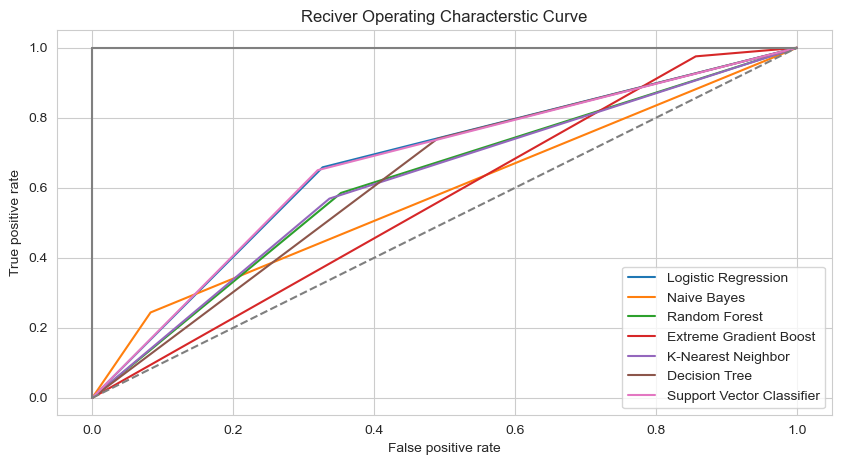

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict_test)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict_test)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict_test)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict_test)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict_test)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict_test)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict_test)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Results

As the Target == 1 was the main problem to predict, we tried to optimized the F1-score rather then the accuracy.
For each model we build a random grid with potential hyperparameters to optimize a model.
The "best" model was applied and printed into the Receiver Operation Characteristic Curve

# Machine Learning with Oversampling Minority Class

The same process is repeated with oversampling the minority class (target==1)

In [104]:
# Prepare the originial data for oversampling
df2 = pd.read_csv("01_framingham_clean.csv")
X1 = df2.drop(columns=["TenYearCHD"])
y1 = df2["TenYearCHD"]

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train1 = scaler.fit_transform(X_train1)

# Use the same scaler to transform the test data
X_test1 = scaler.transform(X_test1)

# Oversampling
from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=1)
X_over1, y_over1 = oversample.fit_resample(X_train1, y_train1)

X_train1 = X_over1
y_train1 = y_over1

## Adjustment of Function

In [105]:
def ml_model_os(model, X_train1, y_train1, X_test1, y_test1):

    # Fit the model
    model.fit(X_train1, y_train1)

    # Predict on the test set
    y_pred_test1 = model.predict(X_test1)

    # Calculate performance metrics for the test set
    acc_test1 = accuracy_score(y_test1, y_pred_test1)
    prec_test1 = precision_score(y_test1, y_pred_test1)
    rec_test1 = recall_score(y_test1, y_pred_test1)
    f1_test1 = f1_score(y_test1, y_pred_test1)

    # Print performance on the test set
    print("Test Set Performance:")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test1, y_pred_test1))
    print("\nAccuracy of Model (Test):", acc_test1 * 100, "\n")
    print(classification_report(y_test1, y_pred_test1))

## Logistic Regression

In [106]:
# Model 1: Logistic Regression
m1 = "Logistic Regression"
lr = LogisticRegression()
# Assuming you have X_train, y_train, X_test, y_test, X_val, y_val ready
results = ml_model_os(lr, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[485 240]
 [ 49  74]]

Accuracy of Model (Test): 65.91981132075472 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       725
           1       0.24      0.60      0.34       123

    accuracy                           0.66       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.66      0.71       848

Model Performance Results: None


In [107]:
# try to focus f1-score to target== 1
f1_scorer = make_scorer(f1_score, pos_label=1)

param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    'penalty': ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 200, 300]
}

lr_model = LogisticRegression()
results = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring=f1_scorer,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train1, y_train1)

print("Best parameters found:", results.best_params_)
print("Best F1 score for target == 1:", results.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best F1 score for target == 1: 0.676975227533654


In [108]:
# Apply improved model

lr = LogisticRegression(solver= 'lbfgs', penalty= 'l2', max_iter= 100, C= 0.1)
# Fit the model
lr.fit(X_train1, y_train1)

# Predict on the test set
lr_predict_test1 = lr.predict(X_test1)
lr_conf_matrix_test1 = confusion_matrix(y_test1, lr_predict_test1)
lr_acc_score_test1 = accuracy_score(y_test1, lr_predict_test1)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(lr_conf_matrix_test1)
print("\nAccuracy of Logistic Regression model (Test):",lr_acc_score_test1 * 100, "\n")
print(classification_report(y_test1, lr_predict_test1))

Test Set Performance:
Confusion Matrix (Test):
[[484 241]
 [ 48  75]]

Accuracy of Logistic Regression model (Test): 65.91981132075472 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       725
           1       0.24      0.61      0.34       123

    accuracy                           0.66       848
   macro avg       0.57      0.64      0.56       848
weighted avg       0.81      0.66      0.71       848



## Naive Bayes

In [109]:
# Model 2: Naive Bayes
m2 = "Logistic Regression"
nb = GaussianNB()
# Assuming you have X_train, y_train, X_test, y_test, X_val, y_val ready
results = ml_model_os(nb, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[666  59]
 [ 95  28]]

Accuracy of Model (Test): 81.83962264150944 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       725
           1       0.32      0.23      0.27       123

    accuracy                           0.82       848
   macro avg       0.60      0.57      0.58       848
weighted avg       0.79      0.82      0.81       848

Model Performance Results: None


In [110]:
# optimization of the Naive Bayes model

f1_scorer = make_scorer(f1_score, pos_label=1)
# grid
param_grid_nb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# train the model
nb_model = GaussianNB()

results = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid_nb,
    n_iter=5,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train1, y_train1)

# Return the best model
print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'var_smoothing': 1e-09}
Best score: 0.44056819712551054


In [111]:
# Apply improved model

nb = GaussianNB(var_smoothing= 1e-09)
# Fit the model
nb.fit(X_train1, y_train1)

# Predict on the test set
nb_predict_test1 = nb.predict(X_test1)
nb_conf_matrix_test1 = confusion_matrix(y_test1, nb_predict_test1)
nb_acc_score_test1 = accuracy_score(y_test1, nb_predict_test1)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(nb_conf_matrix_test1)
print("\nAccuracy of Logistic Regression model (Test):", nb_acc_score_test1 * 100, "\n")
print(classification_report(y_test1, nb_predict_test1))

Test Set Performance:
Confusion Matrix (Test):
[[666  59]
 [ 95  28]]

Accuracy of Logistic Regression model (Test): 81.83962264150944 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       725
           1       0.32      0.23      0.27       123

    accuracy                           0.82       848
   macro avg       0.60      0.57      0.58       848
weighted avg       0.79      0.82      0.81       848



## Decision Tree

In [112]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier()
results = ml_model_os(dt, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[624 101]
 [ 96  27]]

Accuracy of Model (Test): 76.76886792452831 

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       725
           1       0.21      0.22      0.22       123

    accuracy                           0.77       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.77      0.77      0.77       848

Model Performance Results: None


In [113]:
# Improve the Decision Tree model
f1_scorer = make_scorer(f1_score, pos_label=1)
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, None],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"],
    "splitter": ["best", "random"],
}

# train the model
dt_model = DecisionTreeClassifier()

results = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_grid_dt,
    n_iter=20,
    cv=10,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train1, y_train1)

# Return the best model

print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters found: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}
Best score: 0.9125415498840755


In [114]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier(splitter= 'best', min_samples_split= 4, min_samples_leaf= 2, max_features= None, max_depth= None, criterion= 'entropy')
dt.fit(X_train1, y_train1)

# Predict on the test set
dt_predict_test1 = dt.predict(X_test1)
dt_conf_matrix_test1 = confusion_matrix(y_test1, dt_predict_test1)
dt_acc_score_test1 = accuracy_score(y_test1, dt_predict_test1)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(dt_conf_matrix_test1)
print("\nAccuracy of Decision Tree (Test):", dt_acc_score_test1 * 100, "\n")
print(classification_report(y_test1, dt_predict_test1))

Test Set Performance:
Confusion Matrix (Test):
[[622 103]
 [ 93  30]]

Accuracy of Decision Tree (Test): 76.88679245283019 

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       725
           1       0.23      0.24      0.23       123

    accuracy                           0.77       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.78      0.77      0.77       848



## Random Forest

In [115]:
# Model 4: Random Forest
m4 = "Random Forest"
rf = RandomForestClassifier()
results = ml_model_os(rf, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[701  24]
 [110  13]]

Accuracy of Model (Test): 84.19811320754717 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.35      0.11      0.16       123

    accuracy                           0.84       848
   macro avg       0.61      0.54      0.54       848
weighted avg       0.79      0.84      0.80       848

Model Performance Results: None


In [116]:
# Number of trees in random forest
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None]

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# random grid for the predefined parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define scoring metric
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring=f1_scorer
)

# Fit model
rf_random_search.fit(X_train1, y_train1)

# Print best parameters and score
print("Best parameters found:", rf_random_search.best_params_)
print("Best F1 Score:", rf_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-package

Best parameters found: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
Best F1 Score: 0.9820136186235728


In [117]:
# optimized Random Forest Model
m4 = "Random Forest"
rf = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 40, bootstrap= False)
rf.fit(X_train1, y_train1)  # Use undersampled data for training

# Predict on the test set
rf_predict_test1 = rf.predict(X_test1)
rf_conf_matrix_test1 = confusion_matrix(y_test1, rf_predict_test1)
rf_acc_score_test1 = accuracy_score(y_test1, rf_predict_test1)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(rf_conf_matrix_test1)
print("\nAccuracy of Decision Tree (Test):", rf_acc_score_test1 * 100, "\n")
print(classification_report(y_test1, rf_predict_test1))

Test Set Performance:
Confusion Matrix (Test):
[[709  16]
 [113  10]]

Accuracy of Decision Tree (Test): 84.7877358490566 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.38      0.08      0.13       123

    accuracy                           0.85       848
   macro avg       0.62      0.53      0.53       848
weighted avg       0.79      0.85      0.80       848



## Extrem Radient Boost

In [118]:
# Model 5: Extreme Gradient Boost
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier()
results = ml_model(xgb, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[645  80]
 [ 99  24]]

Accuracy of Model (Test): 78.89150943396226 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       725
           1       0.23      0.20      0.21       123

    accuracy                           0.79       848
   macro avg       0.55      0.54      0.54       848
weighted avg       0.77      0.79      0.78       848

Model Performance Results: None


In [119]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 10, 20, 30]  # Adjust for imbalance
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_random_search.fit(X_train1, y_train1)

# Print best parameters and score
print("Best parameters found:", xgb_random_search.best_params_)
print("Best F1 Score:", xgb_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:

Best parameters found: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
Best F1 Score: 0.9466690343234404


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [120]:
# Optimized Model
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier(subsample= 0.8, scale_pos_weight= 1, n_estimators= 500, min_child_weight= 1, max_depth= 9, learning_rate= 0.05, gamma= 0.5, colsample_bytree= 1.0)

xgb.fit(X_train1, y_train1)

# Predict on the test set
xgb_predict_test1 = xgb.predict(X_test1)
xgb_conf_matrix1 = confusion_matrix(y_test1, xgb_predict_test1)
xgb_acc_score1 = accuracy_score(y_test1, xgb_predict_test1)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(xgb_conf_matrix1)
print("\nAccuracy of Extreme Gradient Boost:", xgb_acc_score1 * 100, '\n')
print(classification_report(y_test1, xgb_predict_test1))

Confusion Matrix (Test):
[[670  55]
 [103  20]]

Accuracy of Extreme Gradient Boost: 81.36792452830188 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       725
           1       0.27      0.16      0.20       123

    accuracy                           0.81       848
   macro avg       0.57      0.54      0.55       848
weighted avg       0.78      0.81      0.79       848



## kNN

In [121]:
# Model 6: K-Neighbors Classifier
m6 = "K-Neighbors Classifier"
knn = KNeighborsClassifier()
results = ml_model_os(knn, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[524 201]
 [ 74  49]]

Accuracy of Model (Test): 67.57075471698113 

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       725
           1       0.20      0.40      0.26       123

    accuracy                           0.68       848
   macro avg       0.54      0.56      0.53       848
weighted avg       0.78      0.68      0.72       848

Model Performance Results: None


In [122]:
# Define parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize kNN
knn_model = KNeighborsClassifier()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
knn_random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid,
    n_iter=20,  # Define as per available resources
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
knn_random_search.fit(X_train1, y_train1)

# Print best parameters and score
print("Best parameters found:", knn_random_search.best_params_)
print("Best F1 Score:", knn_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Best F1 Score: 0.9300930433477779


In [123]:
# Initialize the K-Neighbors Classifier
m6 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 1, metric= 'manhattan', algorithm= 'ball_tree')

knn.fit(X_train1, y_train1)

# Predict on the test set
knn_predict_test1 = knn.predict(X_test1)
knn_conf_matrix1 = confusion_matrix(y_test1, knn_predict_test1)
knn_acc_score1 = accuracy_score(y_test1, knn_predict_test1)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(knn_conf_matrix1)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc_score1 * 100, '\n')
print(classification_report(y_test1, knn_predict_test1))

Confusion Matrix (Test):
[[634  91]
 [100  23]]

Accuracy of K-Neighbors Classifier: 77.47641509433963 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       725
           1       0.20      0.19      0.19       123

    accuracy                           0.77       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.77      0.77      0.77       848



## SVM

In [124]:
# Model 7: Support Vector Classifier
m7 = "Support Vector Classifier"
svc = SVC()
results = ml_model_os(svc, X_train1, y_train1, X_test1, y_test1)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[529 196]
 [ 63  60]]

Accuracy of Model (Test): 69.45754716981132 

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       725
           1       0.23      0.49      0.32       123

    accuracy                           0.69       848
   macro avg       0.56      0.61      0.56       848
weighted avg       0.80      0.69      0.73       848

Model Performance Results: None


In [125]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],
    'class_weight': [None, 'balanced']
}

# Initialize SVM
svm_model = SVC()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
svm_random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
svm_random_search.fit(X_train1, y_train1)

# Print best parameters and score
print("Best parameters found:", svm_random_search.best_params_)
print("Best F1 Score:", svm_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'class_weight': None, 'C': 1}
Best F1 Score: 0.981759325845411


In [126]:
# Optimized Model
m7 = 'Support Vector Classifier'
svc = SVC(kernel= 'rbf', gamma= 1, degree= 4, class_weight= None, C= 1)

# Fit the model with the undersampled training data
svc.fit(X_train1, y_train1)

# Predict on the test set
svc_predict_test1 = svc.predict(X_test1)
svc_conf_matrix1 = confusion_matrix(y_test1, svc_predict_test1)
svc_acc_score1 = accuracy_score(y_test1, svc_predict_test1)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(svc_conf_matrix1)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score1 * 100, '\n')
print(classification_report(y_test1, svc_predict_test1))

Confusion Matrix (Test):
[[708  17]
 [120   3]]

Accuracy of Support Vector Classifier: 83.84433962264151 

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       725
           1       0.15      0.02      0.04       123

    accuracy                           0.84       848
   macro avg       0.50      0.50      0.48       848
weighted avg       0.75      0.84      0.79       848



## ROC Curve for model with oversampling the minority class

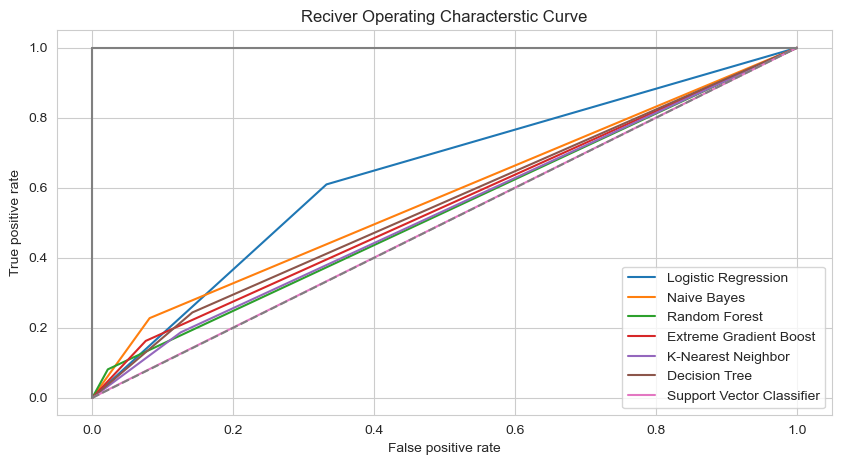

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

lr_false_positive_rate1,lr_true_positive_rate1,lr_threshold1 = roc_curve(y_test1,lr_predict_test1)
nb_false_positive_rate1,nb_true_positive_rate1,nb_threshold1 = roc_curve(y_test1,nb_predict_test1)
rf_false_positive_rate1,rf_true_positive_rate1,rf_threshold1= roc_curve(y_test1,rf_predict_test1)
xgb_false_positive_rate1,xgb_true_positive_rate1,xgb_threshold1 = roc_curve(y_test1,xgb_predict_test1)
knn_false_positive_rate1,knn_true_positive_rate1,knn_threshold1 = roc_curve(y_test1,knn_predict_test1)
dt_false_positive_rate1,dt_true_positive_rate1,dt_threshold1 = roc_curve(y_test1,dt_predict_test1)
svc_false_positive_rate1,svc_true_positive_rate1,svc_threshold1 = roc_curve(y_test1,svc_predict_test1)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate1,lr_true_positive_rate1,label='Logistic Regression')
plt.plot(nb_false_positive_rate1,nb_true_positive_rate1,label='Naive Bayes')
plt.plot(rf_false_positive_rate1,rf_true_positive_rate1,label='Random Forest')
plt.plot(xgb_false_positive_rate1,xgb_true_positive_rate1,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate1,knn_true_positive_rate1,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate1,dt_true_positive_rate1,label='Decision Tree')
plt.plot(svc_false_positive_rate1,svc_true_positive_rate1,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Machine Learning mit SMOTE

In [128]:
# Prepare the originial data for oversampling
df3 = pd.read_csv("01_framingham_clean.csv")
X2 = df3.drop(columns=["TenYearCHD"])
y2 = df3["TenYearCHD"]

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# scale
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train2 = scaler.fit_transform(X_train2)

# Use the same scaler to transform the test data
X_test2 = scaler.transform(X_test2)

# smote
from imblearn.over_sampling import SMOTE

# Smote of scaled values
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train2, y_train2)

X_train2 = X_resampled
y_train2 = y_resampled

## Adjustment of ML function

In [129]:
def ml_model_smote(model, X_train2, y_train2, X_test2, y_test2):

    # Fit the model
    model.fit(X_train2, y_train2)

    # Predict on the test set
    y_pred_test2 = model.predict(X_test2)

    # Calculate performance metrics for the test set
    acc_test2 = accuracy_score(y_test2, y_pred_test2)
    prec_test2 = precision_score(y_test2, y_pred_test2)
    rec_test2 = recall_score(y_test2, y_pred_test2)
    f1_test2 = f1_score(y_test2, y_pred_test2)

    # Print performance on the test set
    print("Test Set Performance:")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test2, y_pred_test2))
    print("\nAccuracy of Model (Test):", acc_test2 * 100, "\n")
    print(classification_report(y_test2, y_pred_test2))

## Logistic Regression

In [130]:
# Model 1: Logistic Regression
m1 = "Logistic Regression"
lr = LogisticRegression()
results = ml_model_smote(lr, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[480 245]
 [ 46  77]]

Accuracy of Model (Test): 65.68396226415094 

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.64      0.56       848
weighted avg       0.81      0.66      0.71       848

Model Performance Results: None


In [131]:
# try to focus f1-score to target== 1
f1_scorer = make_scorer(f1_score, pos_label=1)

param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    'penalty': ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 200, 300]
}

lr_model = LogisticRegression()
results = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring=f1_scorer,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train2, y_train2)

print("Best parameters found:", results.best_params_)
print("Best F1 score for target == 1:", results.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
Best F1 score for target == 1: 0.6773048357934857


In [132]:
# Apply improved model

lr = LogisticRegression(solver= 'liblinear', penalty= 'l2', max_iter= 100, C= 10)
# Fit the model
lr.fit(X_train2, y_train2)

# Predict on the test set
lr_predict_test2 = lr.predict(X_test2)
lr_conf_matrix_test2 = confusion_matrix(y_test2, lr_predict_test2)
lr_acc_score_test2 = accuracy_score(y_test2, lr_predict_test2)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(lr_conf_matrix_test2)
print("\nAccuracy of Logistic Regression model (Test):",lr_acc_score_test2 * 100, "\n")
print(classification_report(y_test2, lr_predict_test2))

Test Set Performance:
Confusion Matrix (Test):
[[480 245]
 [ 46  77]]

Accuracy of Logistic Regression model (Test): 65.68396226415094 

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       725
           1       0.24      0.63      0.35       123

    accuracy                           0.66       848
   macro avg       0.58      0.64      0.56       848
weighted avg       0.81      0.66      0.71       848



## Naive Bayes

In [133]:
# Model 2: Naive Bayes
m2 = "Logistic Regression"
nb = GaussianNB()
results = ml_model_smote(nb, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[657  68]
 [ 89  34]]

Accuracy of Model (Test): 81.48584905660378 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       725
           1       0.33      0.28      0.30       123

    accuracy                           0.81       848
   macro avg       0.61      0.59      0.60       848
weighted avg       0.80      0.81      0.81       848

Model Performance Results: None


In [134]:
# optimization of the Naive Bayes model

f1_scorer = make_scorer(f1_score, pos_label=1)
# grid
param_grid_nb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# train the model
nb_model = GaussianNB()

results = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid_nb,
    n_iter=5,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train2, y_train2)

# Return the best model
print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'var_smoothing': 1e-09}
Best score: 0.42824429281717846


In [135]:
# Apply improved model

nb = GaussianNB(var_smoothing= 1e-09)
# Fit the model
nb.fit(X_train2, y_train2)

# Predict on the test set
nb_predict_test2 = nb.predict(X_test2)
nb_conf_matrix_test2 = confusion_matrix(y_test2, nb_predict_test2)
nb_acc_score_test2 = accuracy_score(y_test2, nb_predict_test2)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(nb_conf_matrix_test2)
print("\nAccuracy of Logistic Regression model (Test):", nb_acc_score_test2 * 100, "\n")
print(classification_report(y_test2, nb_predict_test2))

Test Set Performance:
Confusion Matrix (Test):
[[657  68]
 [ 89  34]]

Accuracy of Logistic Regression model (Test): 81.48584905660378 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       725
           1       0.33      0.28      0.30       123

    accuracy                           0.81       848
   macro avg       0.61      0.59      0.60       848
weighted avg       0.80      0.81      0.81       848



## Decision Tree

In [136]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier()
results = ml_model_smote(dt, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[574 151]
 [ 86  37]]

Accuracy of Model (Test): 72.05188679245283 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       725
           1       0.20      0.30      0.24       123

    accuracy                           0.72       848
   macro avg       0.53      0.55      0.53       848
weighted avg       0.77      0.72      0.74       848

Model Performance Results: None


In [137]:
# Improve the Decision Tree model
f1_scorer = make_scorer(f1_score, pos_label=1)
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, None],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": [None, "sqrt", "log2"],
    "splitter": ["best", "random"],
}

# train the model
dt_model = DecisionTreeClassifier()

results = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_grid_dt,
    n_iter=20,
    cv=10,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    scoring=f1_scorer
)

results.fit(X_train2, y_train2)

# Return the best model

print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters found: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}
Best score: 0.8034687586329581


In [138]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier(splitter= 'best', min_samples_split= 4, min_samples_leaf= 2, max_features= None, max_depth= None, criterion= 'entropy')
dt.fit(X_train2, y_train2)

# Predict on the test set
dt_predict_test2 = dt.predict(X_test2)
dt_conf_matrix_test2 = confusion_matrix(y_test2, dt_predict_test2)
dt_acc_score_test2 = accuracy_score(y_test2, dt_predict_test2)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(dt_conf_matrix_test2)
print("\nAccuracy of Decision Tree (Test):", dt_acc_score_test2 * 100, "\n")
print(classification_report(y_test2, dt_predict_test2))

Test Set Performance:
Confusion Matrix (Test):
[[609 116]
 [ 90  33]]

Accuracy of Decision Tree (Test): 75.70754716981132 

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       725
           1       0.22      0.27      0.24       123

    accuracy                           0.76       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.78      0.76      0.77       848



## Random Forest

In [139]:
# Model 4: Random Forest
m4 = "Random Forest"
rf = RandomForestClassifier()
results = ml_model_smote(rf, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[659  66]
 [102  21]]

Accuracy of Model (Test): 80.18867924528303 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       725
           1       0.24      0.17      0.20       123

    accuracy                           0.80       848
   macro avg       0.55      0.54      0.54       848
weighted avg       0.78      0.80      0.79       848

Model Performance Results: None


In [140]:
# Number of trees in random forest
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# random grid for the predefined parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define scoring metric
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring=f1_scorer
)

# Fit model
rf_random_search.fit(X_train2, y_train2)

# Print best parameters and score
print("Best parameters found:", rf_random_search.best_params_)
print("Best F1 Score:", rf_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-package

Best parameters found: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Best F1 Score: 0.9078591187180999


In [141]:
# optimized Random Forest Model
m4 = "Random Forest"
rf = RandomForestClassifier(n_estimators= 800, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 40, bootstrap= False)
rf.fit(X_train2, y_train2) 

# Predict on the test set
rf_predict_test2 = rf.predict(X_test2)
rf_conf_matrix_test2 = confusion_matrix(y_test2, rf_predict_test2)
rf_acc_score_test2 = accuracy_score(y_test2, rf_predict_test2)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(rf_conf_matrix_test2)
print("\nAccuracy of Decision Tree (Test):", rf_acc_score_test2 * 100, "\n")
print(classification_report(y_test2, rf_predict_test2))

Test Set Performance:
Confusion Matrix (Test):
[[672  53]
 [103  20]]

Accuracy of Decision Tree (Test): 81.60377358490565 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.27      0.16      0.20       123

    accuracy                           0.82       848
   macro avg       0.57      0.54      0.55       848
weighted avg       0.78      0.82      0.80       848



## Extreme Gradient Boost

In [142]:
# Model 5: Extreme Gradient Boost
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier()
results = ml_model(xgb, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[679  46]
 [111  12]]

Accuracy of Model (Test): 81.48584905660378 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       725
           1       0.21      0.10      0.13       123

    accuracy                           0.81       848
   macro avg       0.53      0.52      0.51       848
weighted avg       0.76      0.81      0.79       848

Model Performance Results: None


In [143]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 10, 20, 30]  # Adjust for imbalance
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
xgb_random_search.fit(X_train2, y_train2)

# Print best parameters and score
print("Best parameters found:", xgb_random_search.best_params_)
print("Best F1 Score:", xgb_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:

Best parameters found: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.6}
Best F1 Score: 0.8408490623681901


In [144]:
# Optimized Model
m5 = "Extreme Gradient Boost"
xgb = XGBClassifier(subsample= 0.8, scale_pos_weight= 1, n_estimators= 500, min_child_weight= 1, max_depth= 9, learning_rate= 0.01, gamma= 0, colsample_bytree= 0.6)

xgb.fit(X_train2, y_train2)

# Predict on the test set
xgb_predict_test2 = xgb.predict(X_test2)
xgb_conf_matrix2 = confusion_matrix(y_test2, xgb_predict_test2)
xgb_acc_score2 = accuracy_score(y_test2, xgb_predict_test2)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(xgb_conf_matrix2)
print("\nAccuracy of Extreme Gradient Boost:", xgb_acc_score2 * 100, '\n')
print(classification_report(y_test2, xgb_predict_test2))

Confusion Matrix (Test):
[[671  54]
 [101  22]]

Accuracy of Extreme Gradient Boost: 81.72169811320755 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       725
           1       0.29      0.18      0.22       123

    accuracy                           0.82       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.79      0.82      0.80       848



## KNN

In [145]:
# Model 6: K-Neighbors Classifier
m6 = "K-Neighbors Classifier"
knn = KNeighborsClassifier()
results = ml_model_smote(knn, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[504 221]
 [ 69  54]]

Accuracy of Model (Test): 65.80188679245283 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       725
           1       0.20      0.44      0.27       123

    accuracy                           0.66       848
   macro avg       0.54      0.57      0.52       848
weighted avg       0.78      0.66      0.70       848

Model Performance Results: None


In [146]:
# Define parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize kNN
knn_model = KNeighborsClassifier()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
knn_random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid,
    n_iter=20,  # Define as per available resources
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
knn_random_search.fit(X_train2, y_train2)

# Print best parameters and score
print("Best parameters found:", knn_random_search.best_params_)
print("Best F1 Score:", knn_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
Best F1 Score: 0.8889925138101752


In [147]:
# Initialize the K-Neighbors Classifier
m6 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 1, metric= 'manhattan', algorithm= 'ball_tree')

knn.fit(X_train2, y_train2)

# Predict on the test set
knn_predict_test2 = knn.predict(X_test2)
knn_conf_matrix2 = confusion_matrix(y_test2, knn_predict_test2)
knn_acc_score2 = accuracy_score(y_test2, knn_predict_test2)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(knn_conf_matrix2)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc_score2 * 100, '\n')
print(classification_report(y_test2, knn_predict_test2))

Confusion Matrix (Test):
[[593 132]
 [ 87  36]]

Accuracy of K-Neighbors Classifier: 74.1745283018868 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       725
           1       0.21      0.29      0.25       123

    accuracy                           0.74       848
   macro avg       0.54      0.56      0.55       848
weighted avg       0.78      0.74      0.76       848



## SVM

In [148]:
# Model 7: Support Vector Classifier
m7 = "Support Vector Classifier"
svc = SVC()
results = ml_model_smote(svc, X_train2, y_train2, X_test2, y_test2)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[520 205]
 [ 73  50]]

Accuracy of Model (Test): 67.21698113207547 

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       725
           1       0.20      0.41      0.26       123

    accuracy                           0.67       848
   macro avg       0.54      0.56      0.53       848
weighted avg       0.78      0.67      0.71       848

Model Performance Results: None


In [149]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5],
    'class_weight': [None, 'balanced']
}

# Initialize SVM
svm_model = SVC()

# Define scoring metric (F1 for minority class)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Setup RandomizedSearchCV
svm_random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
svm_random_search.fit(X_train2, y_train2)

# Print best parameters and score
print("Best parameters found:", svm_random_search.best_params_)
print("Best F1 Score:", svm_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'class_weight': None, 'C': 1}
Best F1 Score: 0.9305333758570997


In [150]:
# Optimized Model
m7 = 'Support Vector Classifier'
svc = SVC(kernel= 'rbf', gamma= 1, degree= 4, class_weight= None, C= 1)

# Fit the model with the undersampled training data
svc.fit(X_train2, y_train2)

# Predict on the test set
svc_predict_test2 = svc.predict(X_test2)
svc_conf_matrix2 = confusion_matrix(y_test2, svc_predict_test2)
svc_acc_score2 = accuracy_score(y_test2, svc_predict_test2)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(svc_conf_matrix2)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score2 * 100, '\n')
print(classification_report(y_test2, svc_predict_test2))

Confusion Matrix (Test):
[[693  32]
 [114   9]]

Accuracy of Support Vector Classifier: 82.78301886792453 

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       725
           1       0.22      0.07      0.11       123

    accuracy                           0.83       848
   macro avg       0.54      0.51      0.51       848
weighted avg       0.77      0.83      0.79       848



## ROC Curve for models with SMOTE

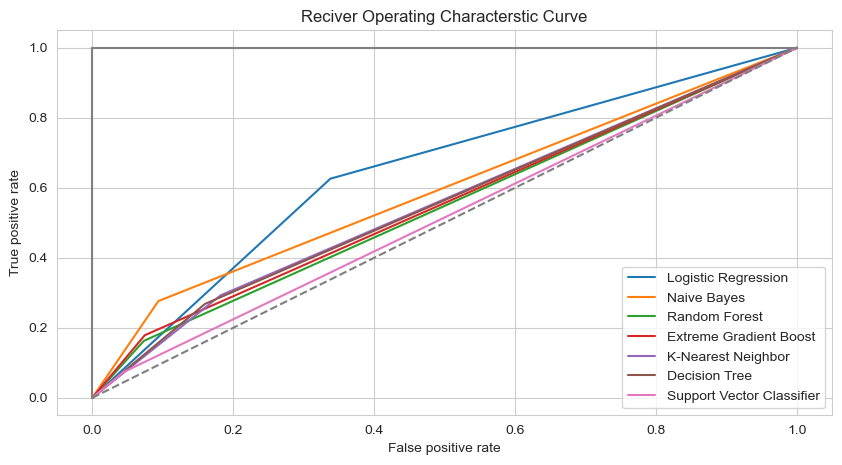

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

lr_false_positive_rate2,lr_true_positive_rate2,lr_threshold2 = roc_curve(y_test2,lr_predict_test2)
nb_false_positive_rate2,nb_true_positive_rate2,nb_threshold2 = roc_curve(y_test2,nb_predict_test2)
rf_false_positive_rate2,rf_true_positive_rate2,rf_threshold2 = roc_curve(y_test2,rf_predict_test2)
xgb_false_positive_rate2,xgb_true_positive_rate2,xgb_threshold2 = roc_curve(y_test2,xgb_predict_test2)
knn_false_positive_rate2,knn_true_positive_rate2,knn_threshold2 = roc_curve(y_test2,knn_predict_test2)
dt_false_positive_rate2,dt_true_positive_rate2,dt_threshold2 = roc_curve(y_test2,dt_predict_test2)
svc_false_positive_rate2,svc_true_positive_rate2,svc_threshold2 = roc_curve(y_test2,svc_predict_test2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate2,lr_true_positive_rate2,label='Logistic Regression')
plt.plot(nb_false_positive_rate2,nb_true_positive_rate2,label='Naive Bayes')
plt.plot(rf_false_positive_rate2,rf_true_positive_rate2,label='Random Forest')
plt.plot(xgb_false_positive_rate2,xgb_true_positive_rate2,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate2,knn_true_positive_rate2,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate2,dt_true_positive_rate2,label='Decision Tree')
plt.plot(svc_false_positive_rate2,svc_true_positive_rate2,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Summary over all different sampling modes - for the best models



## Naive Bayes ROC

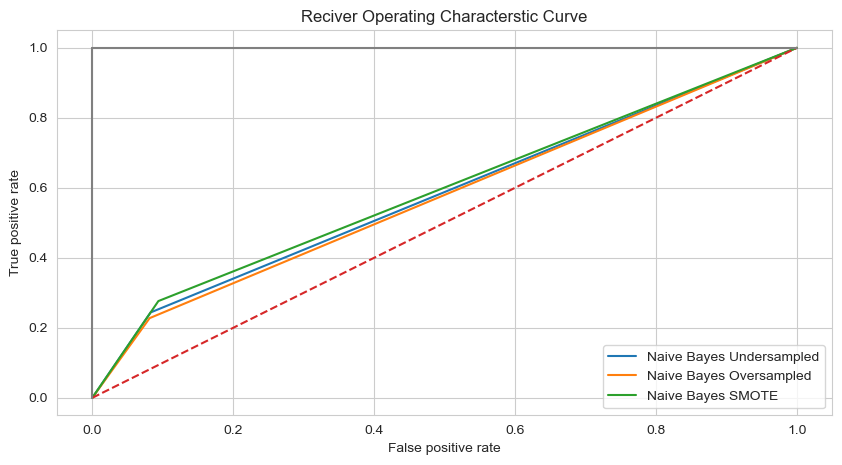

In [154]:
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict_test)
nb_false_positive_rate1,nb_true_positive_rate1,nb_threshold1 = roc_curve(y_test1,nb_predict_test1)
nb_false_positive_rate2,nb_true_positive_rate2,nb_threshold2 = roc_curve(y_test2,nb_predict_test2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes Undersampled')
plt.plot(nb_false_positive_rate1,nb_true_positive_rate1,label='Naive Bayes Oversampled')
plt.plot(nb_false_positive_rate2,nb_true_positive_rate2,label='Naive Bayes SMOTE')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Random Forest ROC

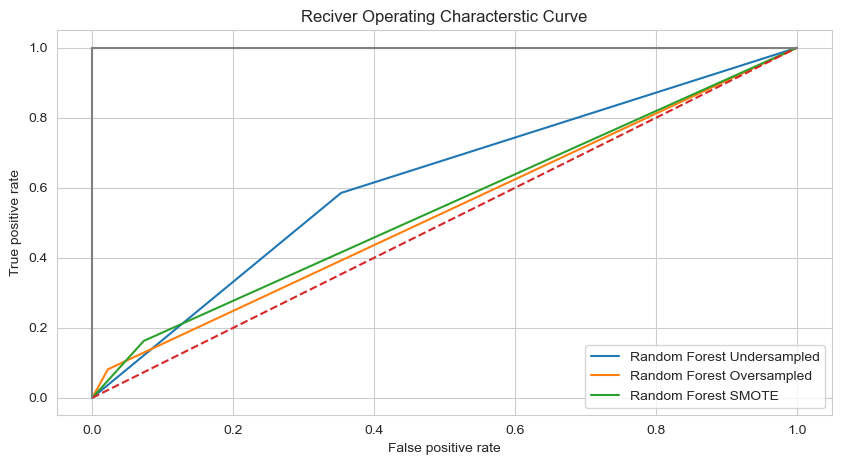

In [155]:
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict_test)
rf_false_positive_rate1,rf_true_positive_rate1,rf_threshold1 = roc_curve(y_test1,rf_predict_test1)
rf_false_positive_rate2,rf_true_positive_rate2,rf_threshold2 = roc_curve(y_test2,rf_predict_test2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest Undersampled')
plt.plot(rf_false_positive_rate1,rf_true_positive_rate1,label='Random Forest Oversampled')
plt.plot(rf_false_positive_rate2,rf_true_positive_rate2,label='Random Forest SMOTE')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()